<a href="https://colab.research.google.com/github/hormigo69/nlp-0-100/blob/main/clasificacion_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de textos con 🤗 Transformers

> Cómo afinar un modelo de RoBERTa en español para clasificar las reseñas de Amazon.

https://www.youtube.com/watch?v=XeFDEokiK3c

## Configuración

Si está ejecutando este notebook en Google Colab, ejecute la siguiente celda para instalar las bibliotecas que necesitamos:
Instalamos Transformers y Datasets ( de Hugginface)

In [1]:
!pip install transformers datasets

     |████████████████████████████████| 2.6 MB 5.3 MB/s 
     |████████████████████████████████| 264 kB 47.6 MB/s 
     |████████████████████████████████| 636 kB 44.9 MB/s 
     |████████████████████████████████| 895 kB 49.0 MB/s 
     |████████████████████████████████| 3.3 MB 32.7 MB/s 
     |████████████████████████████████| 243 kB 32.9 MB/s 
     |████████████████████████████████| 118 kB 45.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Para compartir tu modelo con la comunidad, primero crea una cuenta en el [Hugging Face Hub](https://huggingface.co/join). A continuación, ejecute la siguiente celda y proporcione su nombre de usuario y contraseña para generar un token de autenticación:

In [2]:
# Esto sólo funciona en Google Colab! Para los notebooks normales, es necesario ejecutar esto en el terminal
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        
Username: hormigo@gmail.com
Password: 
Login successful
Your token: VZmdMngIhVcVoWyDBYurLejeHNiwzfUcgtMIafOveXlXCXcppFCUmDYthbxmaYXKvHroPPsfnIvpdMKNCiZkuHFJSNiqYpxSBMzzQtVBtjZbqdwkwJbLVWNBYlOZqvjD 

Your token has been saved to /root/.huggingface/token


Si no tienes instalado [Git LFS](https://git-lfs.github.com), puedes hacerlo descomentando y ejecutando la celda de abajo:
Esto son librerías de Git para subir archivos grandes

In [3]:
!apt install git-lfs
!git config --global user.email "lewis.c.tunstall@gmail.com"
!git config --global user.name "Lewis Tunstall"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 1s (1,940 kB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 148489 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.3.4-1_amd64.deb ...
Unpacking git-lfs (2.3.4-1) ...
Setting up git-lfs (2.3.4-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


## Cargar y explorar los datos

Utilizaremos 🤗 Datasets para cargar y procesar nuestro conjunto de datos. Si no está familiarizado con 🤗 Datasets, vea el siguiente vídeo :)

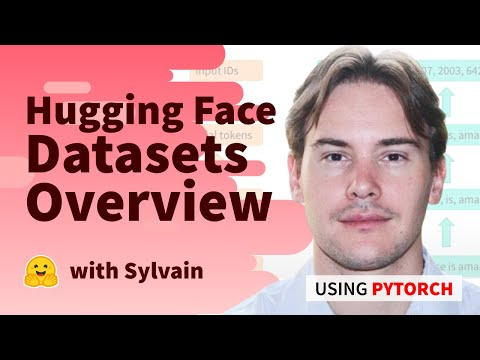

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo("_BZearw7f0w", width=600, height=400)

Cargamos un Dataset de reviews de amazon (https://huggingface.co/datasets/amazon_reviews_multi)

In [4]:
from datasets import load_dataset

#abrimos el dataset con el nombre y el subset para español
dataset = load_dataset("amazon_reviews_multi", "es")
dataset

Downloading:   0%|          | 0.00/2.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.62k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/77.5M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.93M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset amazon_reviews_multi downloaded and prepared to /root/.cache/huggingface/datasets/amazon_reviews_multi/es/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609. Subsequent calls will reuse this data.


DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

In [5]:
#buscamos líneas random para entender el dataset
import random
import pandas as pd
from datasets import ClassLabel
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=10):
    "Taken from https://github.com/huggingface/notebooks/blob/master/examples/text_classification.ipynb"
    
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)
    
    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

show_random_elements(dataset["train"])

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0894178,product_es_0124872,reviewer_es_0142631,5,Súper contenta con estos rulos térmicos- llevo ya años usándolos a diario y son estupendos- se calientan muy rápido y dan un resultado fenomenal!!,Muy buen producto,es,personal_care_appliances
1,es_0611768,product_es_0005790,reviewer_es_0127157,1,Yo no escuchaba el audio,No me funcionaba,es,electronics
2,es_0647016,product_es_0747825,reviewer_es_0309750,5,"Buena compra, dan mucha luz y funcionan perfectamente.",Compra recomendada,es,home
3,es_0750731,product_es_0998647,reviewer_es_0218078,5,Es muy bueno. Funciona perfectamente y en español,Muy muy buena compra,es,home_improvement
4,es_0076908,product_es_0155892,reviewer_es_0960152,3,"ES UN APARATO SENCILLO,. FUNCIONA BIEN",BUEN RESULTADO,es,electronics
5,es_0119474,product_es_0434096,reviewer_es_0648860,5,"Reagalo a mi hijo, imposible encontrar en tiendas",En un momento tu,es,toy
6,es_0361135,product_es_0608783,reviewer_es_0079633,5,Me ha gustado la facilidad con la que hace las explicaciones y lo útil que me ha resultado,Aprender a relajarme para poder dormir mejor,es,digital_ebook_purchase
7,es_0334421,product_es_0908833,reviewer_es_0028598,3,Para adaptar aparatos nuevos a un vehículo clásico y dejar ya la instalación a la espera de nuevos equipos de audio,justo lo que necesito,es,pc
8,es_0620840,product_es_0023603,reviewer_es_0326947,1,Es incompatible con el casco,No vale para el casco,es,kitchen
9,es_0028564,product_es_0952232,reviewer_es_0795076,3,"El producto comprado es satisfactorio. Pero la compañía transportista ha dejado el paquete sin decir nada en otra dirección, sin hacer firmar o sea que cualquier persona lo podría haber cogido. Es mas según el seguimiento me tenia que llegar el día siguiente. Lo mire y ya estaba entregado. Otra cosa he mandado un correo a la compañía y aun no me han solucionado nada.",QUE LLEGUE A LA DIRECCION CORRECTA Y SI NO HAY NADIA QUE NO LO DEJE EN OTRA DIRECCION,es,personal_care_appliances


In [6]:
#pasamos el dtaset a dataframe de pandas
dataset.set_format("pandas")
df = dataset["train"][:]
df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [7]:
#miramos cuantas reseñas hay por cada categoría
df["product_category"].value_counts()

home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch                        1490
industrial_supplies          1482
grocery       

In [8]:
#miramos cuántas valoraciones hay por cada número de estrellas
df["stars"].value_counts()

5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64

In [9]:
#devolvemos el dataset a su formato para operar con él
dataset.reset_format()

## Fusionar las clasificaciones por estrellas
Simplificamos el problema uniendo 5 y 4 estrellas y 1 y 2 y eliminando 3 estrellas.

In [10]:
#quitamos lo valores neutrales para centrarno en positivo o negativo. Esta sería la función explícita, pero lo hacemos con un lambda filter
def filter_neutral_stars(examples):
  return examples["stars"] != 3

In [11]:
dataset = dataset.filter(lambda x : x["stars"] != 3)

  0%|          | 0/200 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

In [12]:
#combinamos 4 y 5 y 1 y 2. Creamos una columna llamada "labels" que dice si los comentarios son positivos o negativos
def merge_star_ratings(examples):
    if examples["stars"] <= 2:
        label = 0
    else:
        label = 1
    return {"labels": label}

In [13]:
dataset = dataset.map(merge_star_ratings)

  0%|          | 0/160000 [00:00<?, ?ex/s]

  0%|          | 0/4000 [00:00<?, ?ex/s]

  0%|          | 0/4000 [00:00<?, ?ex/s]

In [14]:
show_random_elements(dataset["train"], num_examples=3)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,labels
0,es_0960126,product_es_0886659,reviewer_es_0817796,4,"Hay que tener cuidado al fregar con ellos, se escurren los platos, vasos...",LO QUE ME ESPERABA,es,home,1
1,es_0806147,product_es_0474101,reviewer_es_0814811,2,Quizas no lo tenga nunca por que no se a quien se lo han dejado ni nada y ha sido entregado a una hora fuera de comercio cuando figura que es en una tienda de alimentacion asi que estuoendo 15 euros a la basura muchas gracias y menos mal que pago el Prime que sino ni lo mandais..,Raul Sanchez,es,shoes,0
2,es_0079728,product_es_0873718,reviewer_es_0495062,1,El producto llego rajado y hace más de un mes que reclamamos el cambio o devolución sin ninguna respuesta por parte del vendedor,Roto,es,lawn_and_garden,0


## Tokenizar las reseñas
Convertimos los textos de las reseñas (review_body) a tokens, cambiando capa palabra poruna representación numérica.

In [15]:
#usamos un modelo preentrenado para tokenizar los textos. 
#Podemos cambiar el modelo por cualquiera de la página https://huggingface.co/models?language=es&pipeline_tag=fill-mask&sort=downloads

from transformers import AutoTokenizer

model_checkpoint = "BSC-TeMU/roberta-base-bne"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/613 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.15M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/509k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

## Tokenización de las reseñas

Para entender la siguiente sección, vea este breve vídeo sobre la tokenización:

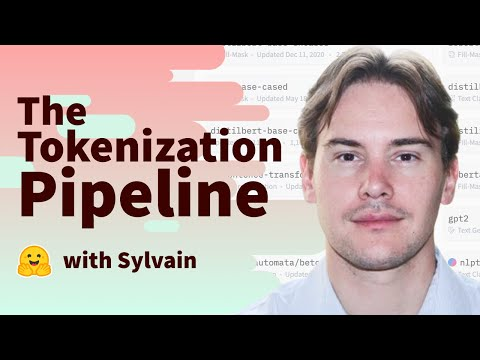

In [ ]:
YouTubeVideo("Yffk5aydLzg", width=600, height=400)

In [16]:
tokenizer.vocab_size

50262

In [17]:
#probamos si funciona con una frase random
#parte la frase en tokens y asigna un número único a cada uno

text = "¡Había una vez un circo!"
tokenized_text = tokenizer.encode(text)

for token in tokenized_text:
    print(token, tokenizer.decode([token]))

0 <s>
1465 ¡
15006 Había
405  una
939  vez
355  un
17904  circo
55 !
2 </s>


In [30]:
"¡¡hola" => <UNK>

SyntaxError: ignored

In [18]:
text.split(" ")

['¡Había', 'una', 'vez', 'un', 'circo!']

In [19]:
#pasamos el texto a tensores
encoded_text = tokenizer(text, return_tensors="pt")
encoded_text

{'input_ids': tensor([[    0,  1465, 15006,   405,   939,   355, 17904,    55,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [20]:
#definimos una función para aplicar el tokenizador a cada línea de ejemplo
#truncation evita que haya frases demasiado largas que obligaría a usar ese tamaño para todos los vectores
def tokenize_reviews(examples):
    return tokenizer(examples["review_body"], truncation=True)

In [21]:
#quitamos las columnas que no interesan y pasamos la función de tokens a los ejemplos
columns = dataset["train"].column_names
columns.remove("labels")
encoded_dataset = dataset.map(tokenize_reviews, batched=True, remove_columns=columns)
encoded_dataset

  0%|          | 0/160 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'input_ids', 'labels'],
        num_rows: 160000
    })
    validation: Dataset({
        features: ['attention_mask', 'input_ids', 'labels'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['attention_mask', 'input_ids', 'labels'],
        num_rows: 4000
    })
})

In [22]:
#esto es un ejemplo de lo que le metemos al modelo, la máscara de atención y lo tokens de uno de los ejemplos
encoded_dataset["train"][0]

{'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'input_ids': [0,
  10626,
  3383,
  361,
  503,
  847,
  36181,
  4747,
  334,
  1111,
  313,
  1369,
  1635,
  342,
  403,
  1594,
  4162,
  2957,
  369,
  10925,
  2],
 'labels': 0}

## Cargar el modelo preentrenado

In [23]:
#cargamos el modelo preentrenado con el nombre del modelo y el número de etiquetas
from transformers import AutoModelForSequenceClassification

num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the model checkpoint at BSC-TeMU/roberta-base-bne were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at BSC-TeMU/roberta-base-bne and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj

### De las input IDs a los hidden states
pasamos un texto y nos da dos "logics" que luego pasaremos a 0 o a 1

In [24]:
outputs = model(**encoded_text)
outputs

SequenceClassifierOutput([('logits',
                           tensor([[0.0664, 0.0048]], grad_fn=<AddmmBackward>))])

## Definir las métricas de rendimiento

In [25]:
from datasets import load_metric 

metric = load_metric("accuracy")
metric

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Metric(name: "accuracy", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions: Predicted labels, as returned by a model.
    references: Ground truth labels.
    normalize: If False, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    sample_weight: Sample weights.
Returns:
    accuracy: Accuracy score.
Examples:

    >>> accuracy_metric = datasets.load_metric("accuracy")
    >>> results = accuracy_metric.compute(references=[0, 1], predictions=[0, 1])
    >>> print(results)
    {'accuracy': 1.0}
""", stored examples: 0)

In [26]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

## Afinar el modelo preentrenado

Si quiere entender más profundamente cómo funciona el Entrenador, vea el siguiente vídeo:

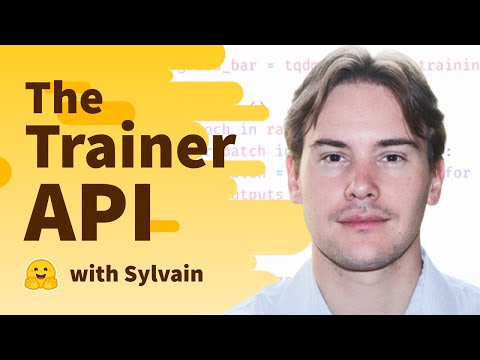

In [ ]:
YouTubeVideo("nvBXf7s7vTI", width=600, height=400)

In [27]:
from transformers import TrainingArguments

model_name = model_checkpoint.split("/")[-1]

batch_size = 16
num_train_epochs=2
num_train_samples = 20_000
train_dataset = encoded_dataset["train"].shuffle(seed=42).select(range(num_train_samples))
logging_steps = len(train_dataset) // (2 * batch_size * num_train_epochs)

training_args = TrainingArguments(
    output_dir="results",
    num_train_epochs=num_train_epochs,     
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch", 
    logging_steps=logging_steps,
    push_to_hub=True,
    push_to_hub_model_id=f"{model_name}-finetuned-amazon_reviews_multi"
)

In [28]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    args=training_args, 
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer
)

In [29]:
trainer.train()

***** Running training *****
  Num examples = 20000
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 2500


Epoch,Training Loss,Validation Loss,Accuracy
1,0.190900,0.171703,0.933250
2,0.093200,0.227476,0.933500


***** Running Evaluation *****
  Num examples = 4000
  Batch size = 16
Saving model checkpoint to results/checkpoint-1250
Configuration saved in results/checkpoint-1250/config.json
Model weights saved in results/checkpoint-1250/pytorch_model.bin
tokenizer config file saved in results/checkpoint-1250/tokenizer_config.json
Special tokens file saved in results/checkpoint-1250/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 4000
  Batch size = 16
Saving model checkpoint to results/checkpoint-2500
Configuration saved in results/checkpoint-2500/config.json
Model weights saved in results/checkpoint-2500/pytorch_model.bin
tokenizer config file saved in results/checkpoint-2500/tokenizer_config.json
Special tokens file saved in results/checkpoint-2500/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from results/checkpoint-2500 (score: 0.9335).


TrainOutput(global_step=2500, training_loss=0.15950738232135772, metrics={'train_runtime': 1578.2211, 'train_samples_per_second': 25.345, 'train_steps_per_second': 1.584, 'total_flos': 2204961088342080.0, 'train_loss': 0.15950738232135772, 'epoch': 2.0})

## Empuje hacia el Hugging Face Hub

Para más detalles sobre el envío de modelos al Hub, vea el siguiente vídeo:

In [31]:
YouTubeVideo("A5IWIxsHLUw", width=600, height=400)

NameError: ignored

In [32]:
trainer.push_to_hub()

Saving model checkpoint to results
Configuration saved in results/config.json
Model weights saved in results/pytorch_model.bin
tokenizer config file saved in results/tokenizer_config.json
Special tokens file saved in results/special_tokens_map.json


'https://huggingface.co/Hormigo/roberta-base-bne-finetuned-amazon_reviews_multi/commit/3a4dcddcadff337f6e080c97bc3b193098eca04e'

## Descargue el modelo desde el Hub

In [33]:
from transformers import pipeline

model_checkpoint = "lewtun/roberta-base-bne-finetuned-amazon_reviews_multi"
pipe = pipeline("sentiment-analysis", model=model_checkpoint)

https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpjh6iiivs


Downloading:   0%|          | 0.00/752 [00:00<?, ?B/s]

storing https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/8bfe8034b9f3457b4aa584e9a8069b1cbb414feb60b0a682e58db822d2a47303.0f71f2eaa9f414cf1b74168eaa6101eaf1d6f2f761afb865947e934b4b74990d
creating metadata file for /root/.cache/huggingface/transformers/8bfe8034b9f3457b4aa584e9a8069b1cbb414feb60b0a682e58db822d2a47303.0f71f2eaa9f414cf1b74168eaa6101eaf1d6f2f761afb865947e934b4b74990d
loading configuration file https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/8bfe8034b9f3457b4aa584e9a8069b1cbb414feb60b0a682e58db822d2a47303.0f71f2eaa9f414cf1b74168eaa6101eaf1d6f2f761afb865947e934b4b74990d
Model config RobertaConfig {
  "_name_or_path": "BSC-TeMU/roberta-base-bne",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "bos_token_id": 0,


Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

storing https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/fcf97e955b2af57170b2915ad329c468af92f5801b6f12e325b4676d071cf7fa.3a3fc6ec80392faf32d3dd5aab18a783c23167b25b2639f1921ba1950d85ebbe
creating metadata file for /root/.cache/huggingface/transformers/fcf97e955b2af57170b2915ad329c468af92f5801b6f12e325b4676d071cf7fa.3a3fc6ec80392faf32d3dd5aab18a783c23167b25b2639f1921ba1950d85ebbe
loading weights file https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/fcf97e955b2af57170b2915ad329c468af92f5801b6f12e325b4676d071cf7fa.3a3fc6ec80392faf32d3dd5aab18a783c23167b25b2639f1921ba1950d85ebbe
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at lewtun

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

storing https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/c8cb37eba441bb3b3290b15946240fc2c7ec8a00e6ca59a16076255e7b005d99.735b884da1059c92a75233ccce6eca23ed0041c535da54b84aa82968aeaf26cd
creating metadata file for /root/.cache/huggingface/transformers/c8cb37eba441bb3b3290b15946240fc2c7ec8a00e6ca59a16076255e7b005d99.735b884da1059c92a75233ccce6eca23ed0041c535da54b84aa82968aeaf26cd
https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/vocab.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpxm87qkvx


Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

storing https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/vocab.json in cache at /root/.cache/huggingface/transformers/08e76e987556a95db77809ecf11eb025c3907cfb74c954d0e1fe7e77f8247e71.0b968504b15b2f5e6e9e491723f31987782cb976064aff9a7c6188cc2d5ce8bc
creating metadata file for /root/.cache/huggingface/transformers/08e76e987556a95db77809ecf11eb025c3907cfb74c954d0e1fe7e77f8247e71.0b968504b15b2f5e6e9e491723f31987782cb976064aff9a7c6188cc2d5ce8bc
https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/merges.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpw1emvmsl


Downloading:   0%|          | 0.00/509k [00:00<?, ?B/s]

storing https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/merges.txt in cache at /root/.cache/huggingface/transformers/825f55eb1e003dce73b3c694f8b414ffa677e14029209282a7afa0adf07aee4c.0d24ae8bd5fabb1f5020f91bc602cefeb5a2938ab77e21769d28776345634b23
creating metadata file for /root/.cache/huggingface/transformers/825f55eb1e003dce73b3c694f8b414ffa677e14029209282a7afa0adf07aee4c.0d24ae8bd5fabb1f5020f91bc602cefeb5a2938ab77e21769d28776345634b23
https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp5nq_04_e


Downloading:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

storing https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/a7c9752a71f608c0650307102524c80b583dccd174849d094b96e81cd1765626.c32009059de03bfd14ed3d1718b64ea822148f9cabd7100826a0d17d4e47596c
creating metadata file for /root/.cache/huggingface/transformers/a7c9752a71f608c0650307102524c80b583dccd174849d094b96e81cd1765626.c32009059de03bfd14ed3d1718b64ea822148f9cabd7100826a0d17d4e47596c
https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpgjwrz15b


Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

storing https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/fa6a00346784f597094dc041826a1e06a88771574368f7f902b135ab8219078f.cb2244924ab24d706b02fd7fcedaea4531566537687a539ebb94db511fd122a0
creating metadata file for /root/.cache/huggingface/transformers/fa6a00346784f597094dc041826a1e06a88771574368f7f902b135ab8219078f.cb2244924ab24d706b02fd7fcedaea4531566537687a539ebb94db511fd122a0
loading file https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/vocab.json from cache at /root/.cache/huggingface/transformers/08e76e987556a95db77809ecf11eb025c3907cfb74c954d0e1fe7e77f8247e71.0b968504b15b2f5e6e9e491723f31987782cb976064aff9a7c6188cc2d5ce8bc
loading file https://huggingface.co/lewtun/roberta-base-bne-finetuned-amazon_reviews_multi/resolve/main/merges.txt from cache at /root/.cache/huggingface/transformers/825f55eb1e003dce73b3c694f8b414ffa677e1

In [37]:
pipe("ni por wifi")

[{'label': 'LABEL_0', 'score': 0.8452608585357666}]